In [12]:
import pandas as pd

# Binariser la donnée

In [26]:
df = pd.DataFrame({"vendeur": ["amazon", "fnac", "fnac", "darty"], "prix": [1200, 1100, 700, 1300]})

In [27]:
df

,vendeur,prix
0,amazon,1200
1,fnac,1100
2,fnac,700
3,darty,1300


In [29]:
dummies = pd.get_dummies(df["vendeur"])

In [30]:
df.join(dummies)

,vendeur,prix,amazon,darty,fnac
0,amazon,1200,1,0,0
1,fnac,1100,0,0,1
2,fnac,700,0,0,1
3,darty,1300,0,1,0


# Binning

In [65]:
import random
s = pd.Series([random.randint(0, 100) for i in range(5)])

In [66]:
s

0    19
1    47
2     6
3     5
4    48
dtype: int64

In [67]:
bins = [0, 10, 60, 100]
labels = ["<10", "ok", ">60"]

In [68]:
pd.cut(s, bins=bins, labels=labels)

0     ok
1     ok
2    <10
3    <10
4     ok
dtype: category
Categories (3, object): ['<10' < 'ok' < '>60']

In [69]:
pd.qcut(s, 2)

0    (4.999, 19.0]
1     (19.0, 48.0]
2    (4.999, 19.0]
3    (4.999, 19.0]
4     (19.0, 48.0]
dtype: category
Categories (2, interval[float64, right]): [(4.999, 19.0] < (19.0, 48.0]]

# Regression linéaire

In [70]:
df = pd.DataFrame({
    "age": [0.5, 1, 2, 2, 2, 3, 4, 10],
    "taille": [50, 60, 70, 56, 62, 80, 83, 110],
})

<AxesSubplot:xlabel='taille', ylabel='age'>

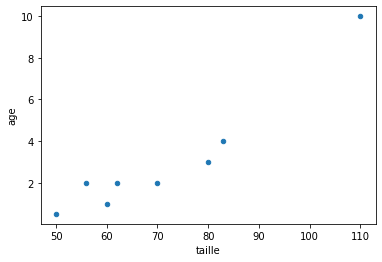

In [14]:
df.plot(x="taille", y="age", kind="scatter")

In [15]:
df

,age,taille
0,0.5,50
1,1.0,60
2,2.0,70
3,2.0,56
4,2.0,62
5,3.0,80
6,4.0,83
7,10.0,110


In [91]:
df["is_even"] = ((df["taille"] % 2) == 0).astype(int)

In [92]:
df

,age,taille,is_even
0,0.5,50,1
1,1.0,60,1
2,2.0,70,1
3,2.0,56,1
4,2.0,62,1
5,3.0,80,1
6,4.0,83,0
7,10.0,110,1


In [72]:
from sklearn import linear_model

In [73]:
regr = linear_model.LinearRegression()

In [102]:
# on cherche à prédire l'âge en fonction de la taille
regr.fit(df[["taille"]], df["age"])

# .fit(X, y)

LinearRegression()

In [103]:
regr.intercept_

-7.4316149395055255

In [104]:
regr.coef_

array([0.14702788])

In [105]:
import joblib

In [106]:
joblib.dump(regr, "model.joblib")

['model.joblib']

In [107]:
regr.predict([[90]])

/Users/blef/.virtualenvs/lab/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.80089427])

In [108]:
predictions = regr.predict([[taille] for taille in range(40, 180)])

/Users/blef/.virtualenvs/lab/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='taille', ylabel='age'>

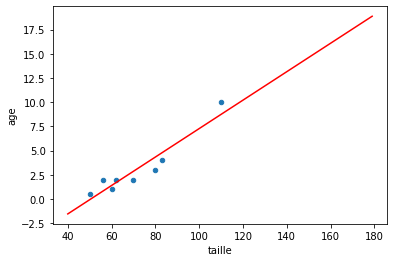

In [109]:
ax = df.plot(x="taille", y="age", kind="scatter")
pd.Series(predictions, index=range(40, 180)).plot(ax=ax, color="red")

# Regression polynomiale

In [110]:
from sklearn.preprocessing import PolynomialFeatures

In [128]:
poly = PolynomialFeatures(degree=9)

In [129]:
X = poly.fit_transform(df[["taille"]])

In [130]:
regr = linear_model.LinearRegression()

In [131]:
regr.fit(X, df["age"])

LinearRegression()

<AxesSubplot:xlabel='taille', ylabel='age'>

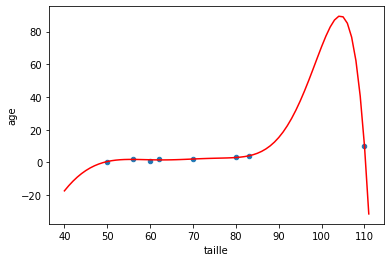

In [134]:
predictions = regr.predict(poly.fit_transform([[taille] for taille in range(40, 112)]))
ax = df.plot(x="taille", y="age", kind="scatter")
pd.Series(predictions, index=range(40, 112)).plot(ax=ax, color="red")

# Regression logistique
### Exercice : écrire un modèle qui prédit le genre d'un prénom

- en comptant le nombre de voyelles -> `vowel_count`
- si ça se termine par une voyelle ou un a -> `vowel_at_end` et `a_at_end`
- sse / lle / tte -> `repeat_at_end`

In [174]:
prenoms = pd.read_csv("prenoms.csv", sep=";").dropna()
pre = prenoms["prenom"].str.lower()

In [233]:
prenoms["vowel_count"] = pre.str.count(r"[aeyuio]")
prenoms["vowel_frequency"] = prenoms["vowel_count"] / pre.str.len()
prenoms["vowel_at_end"] = pre.str.match(r".*[aeyuio]$")
prenoms["a_at_end"] = pre.str.endswith("a")
prenoms["repeat_at_end"] = pre.str.endswith("sse") | pre.str.endswith("tte") | pre.str.endswith("lle")  

In [234]:
prenoms

,prenom,genre,nb,vowel_count,vowel_at_end,a_at_end,repeat_at_end,vowel_frequency
0,Michel,M,14136,2,False,False,False,0.333333
1,Alain,M,10646,3,False,False,False,0.600000
2,Philippe,M,9903,3,True,False,False,0.375000
3,Bernard,M,8992,2,False,False,False,0.285714
4,Christian,M,8102,3,False,False,False,0.333333
...,...,...,...,...,...,...,...,...
12462,F.Jacques,M,1,3,False,False,False,0.333333
12463,Frédie,F,1,2,True,False,False,0.333333
12464,Efisia,F,1,4,True,True,False,0.666667
12465,Cosima,F,1,3,True,True,False,0.500000


In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
# DATA + FE
features = ["vowel_count", "vowel_at_end", "a_at_end", "repeat_at_end"]
X = prenoms[features]
y = prenoms["genre"]

In [237]:
# TRAIN + TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)

In [238]:
logregr = LogisticRegression()

In [239]:
logregr.fit(X_train, y_train)

LogisticRegression()

In [240]:
from sklearn.metrics import accuracy_score, recall_score

In [241]:
accuracy_score(y_test, logregr.predict(X_test))

0.6946524064171123

In [242]:
recall_score(y_test, logregr.predict(X_test), pos_label='M')

0.5578947368421052

In [243]:
logregr.score(X_test, y_test)

0.6946524064171123

### Test d'un autre modèle

In [248]:
# DATA + FE
features = ["vowel_count", "vowel_at_end", "a_at_end", "repeat_at_end"]
X = prenoms[features]
y = prenoms["genre"]

# TRAIN + TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)

logregr_2 = LogisticRegression()

logregr_2.fit(X_train, y_train)

predictions = logregr_2.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, pos_label="F")

print(accuracy, recall)

0.6946524064171123 0.8510028653295129


In [247]:
logregr_2.coef_

array([[-0.02301209, -1.45370376, -1.65224941, -1.30241611]])